# SET UP

In [ ]:
!python3 --version

Python 3.7.13


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os as os
os.chdir("/content/gdrive/MyDrive/comp_proj")

In [ ]:
!pip3 install -U sentence-transformers
!pip3 install -U numpy
!pip3 install kneed

     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 4.0 MB 12.9 MB/s 
     |████████████████████████████████| 1.2 MB 12.8 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 29.2 MB/s 
     |████████████████████████████████| 6.6 MB 29.8 MB/s 
     |████████████████████████████████| 895 kB 37.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=f94d9dd31bfe0d66ca0f4eb5a37e9d481a5fe6403365e0d1fdcb3a7dcfb4a8cb
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# A Python interface to the Penn Discourse Treebank 2
!git clone https://github.com/cgpotts/pdtb2.git

fatal: destination path 'pdtb2' already exists and is not an empty directory.


In [ ]:
os.chdir("/content/gdrive/MyDrive/comp_proj/pdtb2")

In [ ]:
#import statements
from sklearn.cluster import KMeans
import numpy as np
from pdtb2 import CorpusReader, Datum
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
from collections import Counter
import pandas as pd

# Data Extraction and Preprocessing

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
import torch

model_sent = SentenceTransformer('all-mpnet-base-v2')
qa_search = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
semantic_serch = SentenceTransformer('sentence-transformers/msmarco-distilbert-dot-v5')# not good

def sent_transformer(sentences):
  embeddings = qa_search.encode(sentences)
  return embeddings


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/383 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/320 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
#Read in Data
X_sentences = []
y = []
rel_tag = []
iterator = CorpusReader('pdtb2.csv').iter_data(display_progress=False)
try:
    while(True):
        d = next(iterator)
        arg1 = d.Arg2_RawText
        arg2 = d.Arg2_Attribution_RawText
        relation = d.Relation
        connection = None
        if relation == "Explicit":
            connection = str(d.ConnHead).lower()
            X_sentences.append([str(d.Arg1_RawText).lower(),
                                str(d.ConnHead).lower(),
                                str(d.Arg2_RawText).lower()])
            y.append(str(d.ConnHead).lower())
            rel_tag.append(str(d.ConnHeadSemClass1).lower())
        '''
        if relation=="Implicit":
            connection=d.Conn1
            X_sentences.append([d.Arg1_RawText,connection,d.Arg2_RawText])
            y.append(connection)
        '''
except:
    print("end")

end


In [ ]:
# arg1 sentence and arg2 sentence
X_sentences[2]

['that hung over parts of the factory',
 'though',
 'exhaust fans ventilated the area']

In [ ]:
#connective phrase
y[2]

'though'

In [ ]:
len(X_sentences)

18459

In [ ]:
arg1,conn,arg2=sent_transformer(sentences)

In [ ]:
def concate(arg1,conn,arg2):
    return np.concatenate(arg1,conn,arg2)
def similarity(arg1,conn,arg2):
    return np.concatenate([arg1, conn, arg2, np.absolute(np.subtract(arg1,arg2)), [np.dot(arg1,arg2)]])
def dot_product(arg1,conn,arg2):
    return np.concatenate([[np.dot(arg1,arg2)]])
n=len(X_sentences)

In [ ]:
# extract features use bert sentence transformers and concatenate two embedings.
# reference : https://huggingface.co/sentence-transformers/bert-base-nli-mean-tokens
# save features to file because it cost a lot of time extracting the features

n = len(X_sentences)
with open('features.npy', 'wb') as f:
  c = 1
  start = time.time()
  for sentences in X_sentences:
    arg1,conn,arg2=sent_transformer(sentences)
    feature = similarity(arg1,conn,arg2)
    np.save(f, feature)
    if c % 1000 == 0:
      print(str(c) + "/" + str(n) + " complete.")
    if c % n == 0:
      print(str(c) + "/" + str(n) + " complete.")
    c += 1
  end = time.time()
  print("Total runtime: {} seconds".format(round(end - start, 2)))

1000/18459 complete.
2000/18459 complete.
3000/18459 complete.
4000/18459 complete.
5000/18459 complete.
6000/18459 complete.
7000/18459 complete.
8000/18459 complete.
9000/18459 complete.
10000/18459 complete.
11000/18459 complete.
12000/18459 complete.
13000/18459 complete.
14000/18459 complete.
15000/18459 complete.
16000/18459 complete.
17000/18459 complete.
18000/18459 complete.
18459/18459 complete.
Total runtime: 209.77 seconds


In [ ]:
# load features from file

X = []
with open('features.npy', 'rb') as f:
  for _ in range(n):
    X.append(np.load(f,allow_pickle=True))

In [ ]:
len(X)

18459

In [ ]:
def view_labels(X, X_sentences, algo_labels, u, level="secondary"):
  # algo_labels is labels as found by the algorithm in 1D array form
  # u is number of clusters

  arg1s = [x[0] for x in X_sentences]
  arg2s = [x[2] for x in X_sentences]
  arg_conn = [x[1] for x in X_sentences]
  arg_label = [y for y in rel_tag]
  df = pd.DataFrame([arg1s,arg2s,arg_conn,algo_labels, arg_label]).transpose()
  df.columns = ['arg1','arg2','connective', 'algo', 'pdtb_tag']

  df[['primary', 'secondary', 'tertiary']] = df.pdtb_tag.str.split('.', expand=True)
  df['primary'] = df['primary'].fillna("<empty_1>")
  df['secondary'] = df['secondary'].fillna("<empty_2>")
  df['tertiary'] = df['tertiary'].fillna("<empty_3>")

  labels = []
  for label in range(u):
    df2 = df[df['algo'] == label]
    tmp_list1 = set(df2["connective"])
    [x, y] = [label, [tmp_list1]]
    labels.append([x,y])

  connective_to_label = []
  for word in range(len(list(set(df["connective"])))):
    connective = list(set(df["connective"]))[word] 
    df2 = df[df["connective"] == connective]
    tmp_list2 = set(df2["algo"])
    [x,y] = [connective, [tmp_list2]]
    connective_to_label.append([x,y])

  pdtb_connective_to_label = []
  for word in range(len(list(set(df["connective"])))):
    connective = list(set(df["connective"]))[word] 
    df2 = df[df["connective"] == connective]
    tmp_list3 = set(df2[level])
    [x,y] = [connective, [tmp_list3]]
    pdtb_connective_to_label.append([x,y])

  pdtb_label_connectives = []
  for label in range(len(list(set(df[level])))):
    label_word = list(set(df[level]))[label]
    df2 = df[df[level] == label_word]
    tmp_list4 = set(df2["connective"])
    [x, y] = [label_word, [tmp_list4]]
    pdtb_label_connectives.append([x,y])

  algo_to_pdtb = []
  for label in range(u):
    df2 = df[df['algo'] == label]
    tmp_list5 = set(df2[level])
    [x, y] = [label, [tmp_list5]]
    algo_to_pdtb.append([x,y])

  pdtb_to_algo = []
  for label in range(len(list(set(df[level])))):
    label_word = list(set(df[level]))[label]
    df2 = df[df[level] == label_word]
    tmp_list6 = set(df2["algo"])
    [x, y] = [label_word, [tmp_list6]]
    pdtb_to_algo.append([x,y])

  return df, labels, connective_to_label, pdtb_connective_to_label, pdtb_label_connectives, algo_to_pdtb, pdtb_to_algo

# KMEANS

## Kmeans- range

In [ ]:

distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    print(k)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


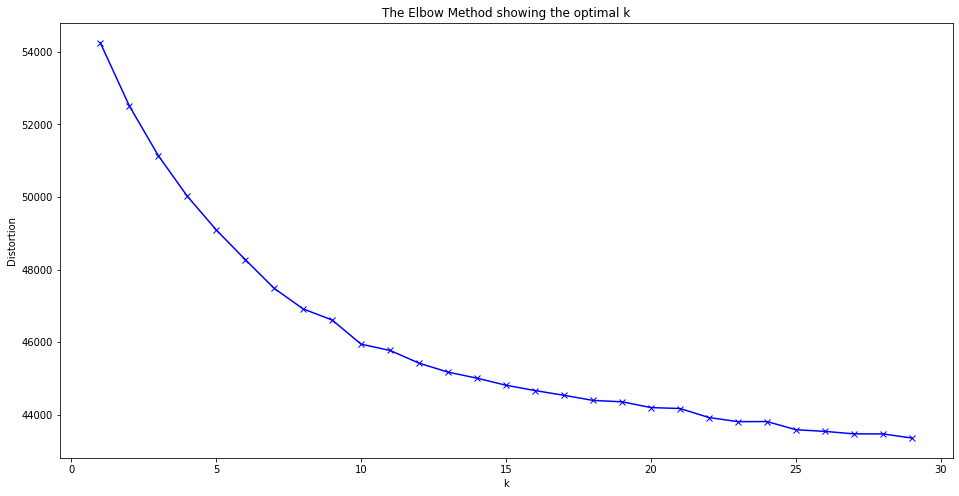

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

9


<Figure size 360x360 with 0 Axes>

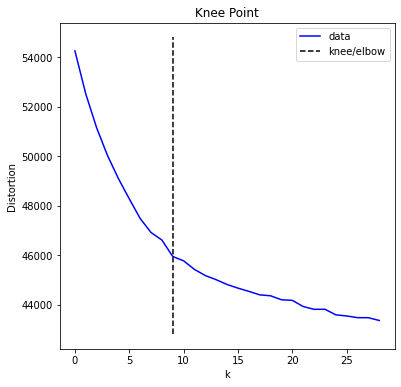

In [ ]:
#use knee locater to locate elbow point
from kneed import KneeLocator
i = np.arange(len(distortions))
knee = KneeLocator(i, distortions, S=1, curve='convex', direction='decreasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("k")
plt.ylabel("Distortion")

print(knee.knee)


In [ ]:
#Notes from Jay
#run kmeans instead on the full sentence so that the connective is 
#appropriately contextualized

# Then either concatenate the connective's embedding on its own
# to the end of the sentence
# or some other transformation dot(full_sentence, connective)
# and pass that through into k-means
# also dont forget to put the entire sentence as lowercase
# or uppercase if you feel angry.

## KMeans - individual

In [ ]:
# unique connectives 
u = knee.knee
#u = 9

In [ ]:
# reference : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters = u, 
                random_state=0).fit(X)

In [ ]:
df, labels_K, connective_to_label_K, pdtb_conn_labels, pdtb_labels, algo_pdtb, pdtb_algo = view_labels(X, X_sentences, kmeans.labels_, u)

In [ ]:
pdtb_labels

[['pragmatic contrast', [{'but', 'however', 'if'}]],
 ['asynchronous',
  [{'after',
    'afterward',
    'and',
    'as',
    'as soon as',
    'before',
    'before and after',
    'but',
    'by then',
    'earlier',
    'finally',
    'in the end',
    'in turn',
    'later',
    'meantime',
    'next',
    'now that',
    'once',
    'previously',
    'since',
    'still',
    'then',
    'thereafter',
    'till',
    'ultimately',
    'until',
    'when',
    'when and if'}]],
 ['cause',
  [{'accordingly',
    'and',
    'as',
    'as a result',
    'because',
    'but',
    'consequently',
    'for',
    'hence',
    'if',
    'in the end',
    'in turn',
    'insofar as',
    'now that',
    'since',
    'so',
    'so that',
    'then',
    'thereby',
    'therefore',
    'thus',
    'when'}]],
 ['synchrony',
  [{'also',
    'as',
    'as long as',
    'as soon as',
    'by then',
    'meantime',
    'meanwhile',
    'now that',
    'once',
    'simultaneously',
    'since',
   

In [ ]:
connective_to_label_K

[['so', [{4, 6}]],
 ['until', [{6}]],
 ['but', [{1}]],
 ['hence', [{6}]],
 ['meanwhile', [{4}]],
 ['much as', [{3}]],
 ['likewise', [{4}]],
 ['as soon as', [{3, 6}]],
 ['as', [{3}]],
 ['thereafter', [{6}]],
 ['in contrast', [{4}]],
 ['or', [{0}]],
 ['insofar as', [{4}]],
 ['thus', [{4, 6}]],
 ['thereby', [{4, 6}]],
 ['similarly', [{4, 5}]],
 ['meantime', [{6}]],
 ['otherwise', [{4, 6}]],
 ['before', [{6}]],
 ['in short', [{4, 6}]],
 ['on the other hand', [{4}]],
 ['rather', [{4}]],
 ['yet', [{4, 6}]],
 ['except', [{1}]],
 ['when and if', [{8}]],
 ['then', [{6}]],
 ['by comparison', [{4}]],
 ['accordingly', [{4, 6}]],
 ['nonetheless', [{4}]],
 ['neither nor', [{4}]],
 ['now that', [{6}]],
 ['simultaneously', [{4}]],
 ['also', [{5}]],
 ['if and when', [{8}]],
 ['unless', [{4, 8}]],
 ['ultimately', [{6}]],
 ['once', [{4, 6}]],
 ['for', [{6}]],
 ['in sum', [{4}]],
 ['and', [{0}]],
 ['so that', [{6}]],
 ['by then', [{6}]],
 ['specifically', [{4, 5}]],
 ['lest', [{6}]],
 ['although', [{4}]],

In [ ]:
cols = [i for i in range(u)]
conntive_clusters = [list(x[1][0]) for x in labels_K]
df = pd.DataFrame(conntive_clusters).transpose()
df.columns = cols
df

0        1     2                  3  \
0          or  however  when        as a result   
1   either or   except  None         as soon as   
2         and      but  None  as an alternative   
3        None     None  None                 as   
4        None     None  None         as long as   
5        None     None  None            much as   
6        None     None  None              as if   
7        None     None  None               None   
8        None     None  None               None   
9        None     None  None               None   
10       None     None  None               None   
11       None     None  None               None   
12       None     None  None               None   
13       None     None  None               None   
14       None     None  None               None   
15       None     None  None               None   
16       None     None  None               None   
17       None     None  None               None   
18       None     None  None               None   
19       None     None  None               None   
20       None     None  None               None   
21       None     None  None               None   
22       None     None  None               None   
23       None     None  None               None   
24       None     None  None               None   
25       None     None  None               None   
26       None     None  None               None   
27       None     None  None               None   
28       None     None  None               None   
29       None     None  None               None   
30       None     None  None               None   
31       None     None  None               None   
32       None     None  None               None   
33       None     None  None               None   
34       None     None  None               None   
35       None     None  None               None   
36       None     None  None               None   
37       None     None  None               None   
38       None     None  None               None   
39       None     None  None               None   
40       None     None  None               None   
41       None     None  None               None   
42       None     None  None               None   
43       None     None  None               None   
44       None     None  None               None   
45       None     None  None               None   
46       None     None  None               None   
47       None     None  None               None   
48       None     None  None               None   
49       None     None  None               None   

                                    4              5                 6  \
0                                 nor   specifically        previously   
1                         for example           also             since   
2                               still        besides             still   
3                   on the other hand  alternatively           as well   
4                             as well           plus                so   
5                                  so        further             until   
6                           either or       moreover              else   
7                              rather      similarly           earlier   
8                              indeed        as well               yet   
9                                 yet     separately         afterward   
10                    on the contrary   additionally  before and after   
11                     in other words    in addition              then   
12                            in fact    furthermore           in fact   
13                         regardless           None     alternatively   
14                      by comparison           None             hence   
15                        accordingly           None       accordingly   
16                          meanwhile           None              next   
17                        nonetheless           None        in the end   
18  

In [ ]:
from pathlib import Path  
filepath = Path('out_dotproduct_5_semanticSearchEmbedding.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [ ]:
def tag_by_labels(kmeans_label,rel_tag):

  cols=["kmeans_label","primary_tag","secondary_tag","tertiary_tag"]

  df = pd.DataFrame(columns=cols, )
  for i in range(len(rel_tag)):
    pri, *rest = rel_tag[i].split(".")
    sec = None
    ter = None
    if len(rest)==1: sec = rest[0]
    if len(rest)==2: sec = rest[1]

    df = df.append({
        "kmeans_label":kmeans_label[i],
        "primary_tag":pri,
        "secondary_tag":sec,
        "tertiary_tag":ter
    },ignore_index=True)
  return df


In [ ]:
!pwd

/content/gdrive/.shortcut-targets-by-id/1_TIEGBEbQndxVKku0YW1OQJ85tfswmMR/comp_proj/pdtb2


In [ ]:
df=tag_by_labels(kmeans.labels_,rel_tag)
df_count=df.groupby(['kmeans_label','secondary_tag']).size().reset_index(name='counts')

In [ ]:
from pathlib import Path  
df_count
filepath = Path('similarityconcate_kmeans_QAEmbeddings_count.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
df_count.to_csv(filepath)  

kmeans_label         secondary_tag  counts
11             1            concession       1
12             1             condition       2
13             1    contra-expectation       5
14             1              contrast       1
15             1           expectation      37
16             1          factual past       9
17             1       factual present      84
18             1               general     182
19             1          hypothetical     708
20             1    implicit assertion      30
21             1         juxtaposition       4
22             1  pragmatic concession       1
23             1    pragmatic contrast       1
24             1             relevance      20
25             1                result       1
26             1         specification       1
27             1           unreal past      54
28             1        unreal present     122

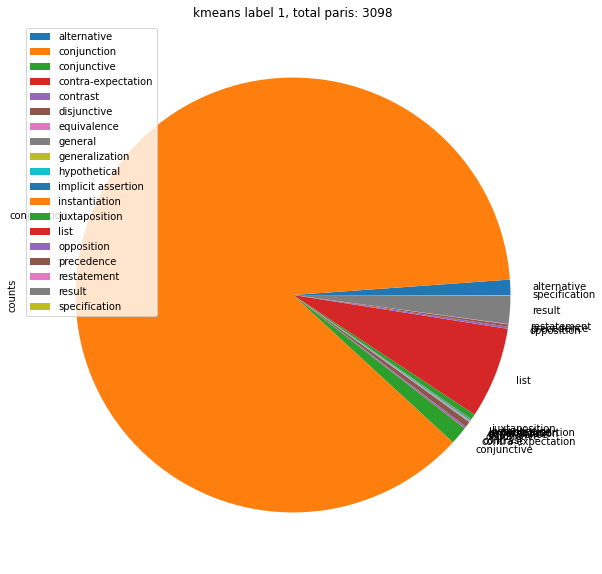

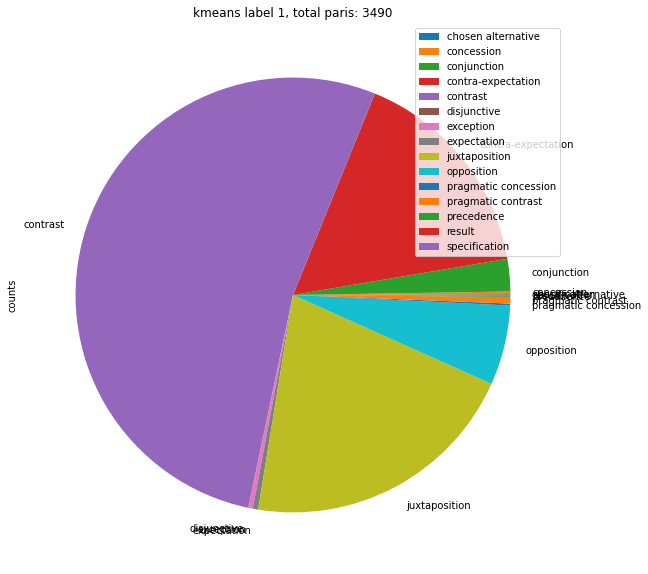

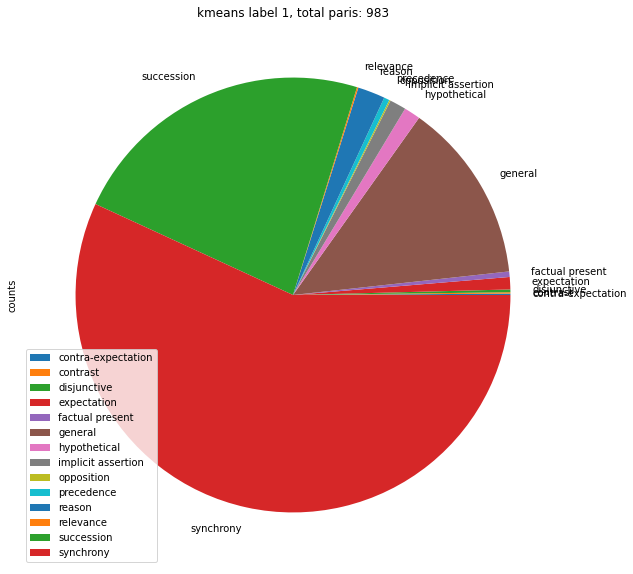

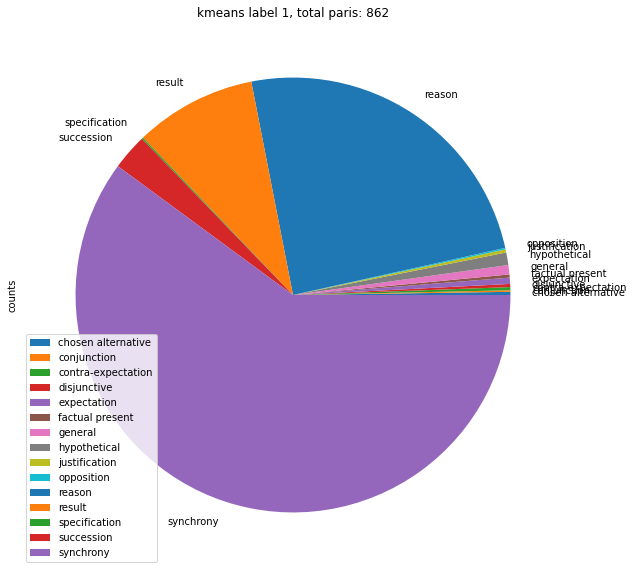

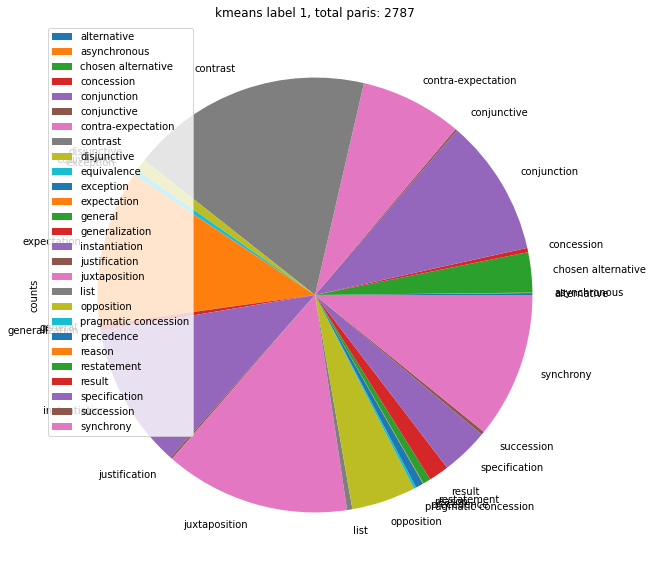

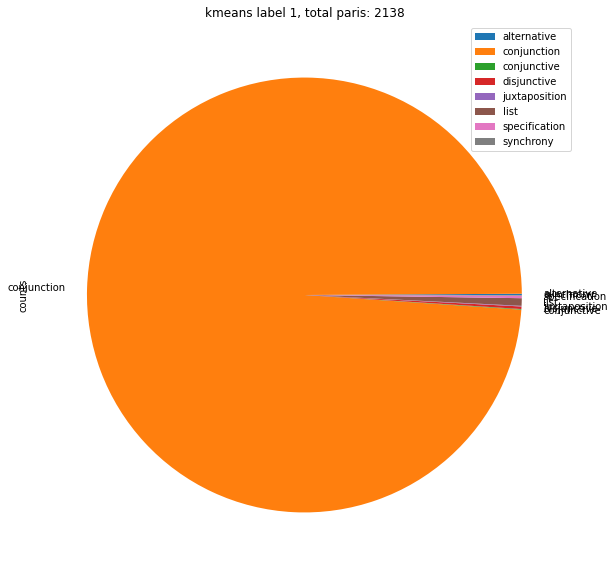

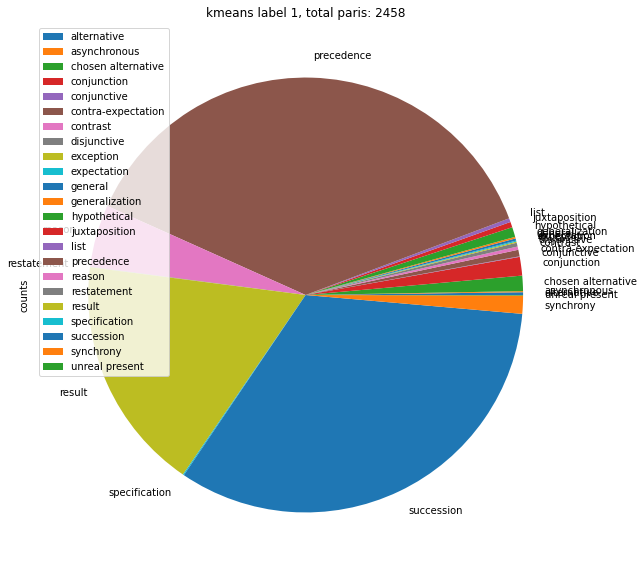

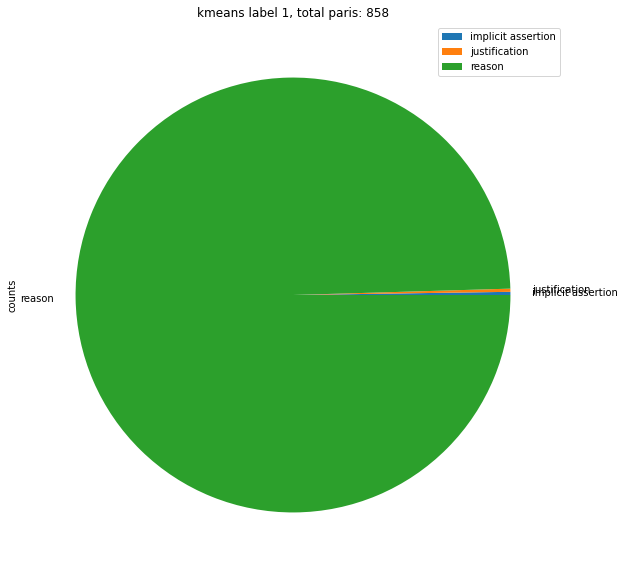

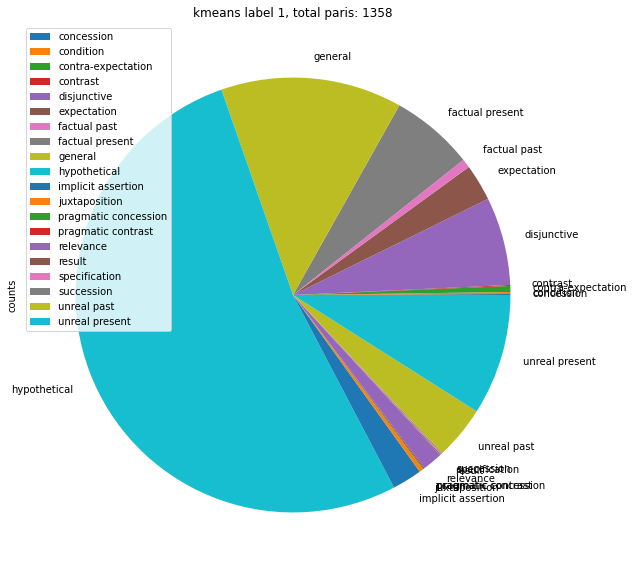

In [ ]:
for i in range(u):
  df_by_klabel=df_count.loc[df_count['kmeans_label'] == i]
  total_number = df_by_klabel["counts"].sum()
  plt=df_by_klabel.set_index("secondary_tag").plot.pie(y='counts', figsize=(10, 10),fontsize=10)
  plt.set_title("kmeans label 1, total paris: "+str(total_number))

## t-SNE Visualization using KMeans Clusters

https://builtin.com/data-science/unsupervised-learning-python
"One of the unsupervised learning methods for visualization is t-distributed stochastic neighbor embedding, or t-SNE. It maps high-dimensional space into a two or three-dimensional space which can then be visualized. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability"

In [ ]:
# Defining Model
model = TSNE(learning_rate=100)
# Fitting Model
transformed = model.fit_transform(X)
num_clusters = 11

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
from yellowbrick.text import TSNEVisualizer
clusters = KMeans(n_clusters=num_clusters)
clusters.fit(transformed)

tsne = TSNEVisualizer()
tsne.fit(X, ["c{}".format(c) for c in clusters.labels_])
tsne.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

In [ ]:
labels_tSNE,connective_to_label_tSNE = view_labels(X, X_sentences, clusters.labels_, num_clusters)

In [ ]:
labels_tSNE

[[0,
  [{'afterward',
    'also',
    'alternatively',
    'although',
    'and',
    'as an alternative',
    'as well',
    'before',
    'besides',
    'but',
    'by then',
    'else',
    'finally',
    'for',
    'however',
    'if',
    'in fact',
    'in other words',
    'in particular',
    'in short',
    'in sum',
    'in the end',
    'in turn',
    'insofar as',
    'later',
    'likewise',
    'moreover',
    'on the contrary',
    'regardless',
    'separately',
    'specifically',
    'then',
    'though',
    'ultimately',
    'whereas'}]],
 [1,
  [{'and',
    'but',
    'by comparison',
    'by contrast',
    'however',
    'in contrast',
    'meantime',
    'meanwhile',
    'nevertheless',
    'nonetheless',
    'on the one hand on the other hand',
    'on the other hand',
    'still',
    'though',
    'whereas',
    'while',
    'yet'}]],
 [2,
  [{'also',
    'and',
    'as',
    'as though',
    'conversely',
    'indeed',
    'much as',
    'overall'}]],
 [3,
  

In [ ]:
connective_to_label_tSNE

# DBSCAN

Following: https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62

the linear boundary of the k-means clustering definitely does not work well. However, DBSCAN doesn’t require any shape of the clusters but tracks the high-density regions

There are a few implicit assumptions in this approach:
*   Densities across all the clusters are the same.
*   Cluster sizes or standard deviations are the same.


A large eps tend to include more points within a cluster, so a too-large eps will include everything in the same single cluster and a too-small eps will result in no clustering at all.

A too-small minPts is not meaningful because it will regard every point as a core point. A relatively larger minPts can be better to deal with data with more noises.

## Finding Parameters using nearest neighbors

In [ ]:
#use nearest neighbors to help calculate our eps argument with dbscan

In [ ]:
from sklearn.neighbors import NearestNeighbors
#https://scikit-learn.org/stable/modules/neighbors.html
#start by using sqrt(N) for number of neighbors

#two different approaches
#num_neighs = round(len(X)/11) #naively we expect around 11 clusters 
num_neighs = 100

nearest_neighbors = NearestNeighbors(n_neighbors=num_neighs)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

Text(0, 0.5, 'Distance')

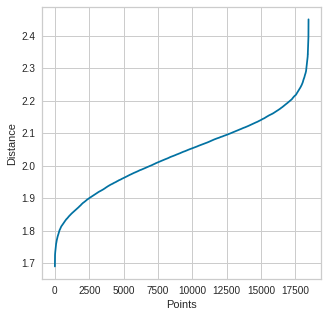

In [ ]:
#plot
import matplotlib.pyplot as plt
distances_sorted = np.sort(distances[:,100-1], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances_sorted)
plt.xlabel("Points")
plt.ylabel("Distance")

#When num_neighs = len(X)/11 -- could look at other elbow point in data

2.178665


<Figure size 360x360 with 0 Axes>

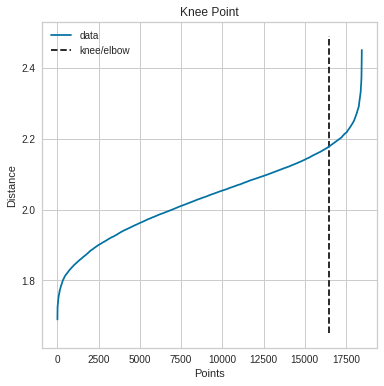

In [ ]:
#find eps from the above graph using KneeLocator to Detect Elbow Point
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances_sorted, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(knee.knee_y)

## Run Model

In [ ]:
from sklearn.cluster import DBSCAN
eps = knee.knee_y
DBSCAN_cluster = DBSCAN(eps=1.65, min_samples=25).fit(X)
#print(DBSCAN_cluster.labels_)

In [ ]:
num_outliers = np.sum(DBSCAN_cluster.labels_ == -1)
num_clusters = len(np.unique(DBSCAN_cluster.labels_)) - 1
percentage_outliers = num_outliers/len(DBSCAN_cluster.labels_) * 100
print("Num_outliers: " + str(num_outliers))
print("Num_clusters: " + str(num_clusters))
print("Percentage of points that are outliers: " + str(percentage_outliers))

Num_outliers: 17825
Num_clusters: 4
Percentage of points that are outliers: 96.56536107048052


In [ ]:
DBSCAN_labels = DBSCAN_cluster.labels_
if (num_outliers > 0):
  #if there are outliers in the data, shift the data up to print the unlustered data, otherwise leave as is
  DBSCAN_labels = DBSCAN_labels + 1
df,labels_DBSCAN,connective_to_label_DBSCAN, _, _, _, _ = view_labels(X, X_sentences, DBSCAN_labels, len(set(DBSCAN_labels)))

In [ ]:
# label 0 is outlier data if num_outliers > 0
labels_DBSCAN

[[0,
  [{'accordingly',
    'additionally',
    'after',
    'afterward',
    'also',
    'alternatively',
    'although',
    'and',
    'as',
    'as a result',
    'as an alternative',
    'as if',
    'as long as',
    'as soon as',
    'as though',
    'as well',
    'because',
    'before',
    'before and after',
    'besides',
    'but',
    'by comparison',
    'by contrast',
    'by then',
    'consequently',
    'conversely',
    'earlier',
    'either or',
    'else',
    'except',
    'finally',
    'for',
    'for example',
    'for instance',
    'further',
    'furthermore',
    'hence',
    'however',
    'if',
    'if and when',
    'if then',
    'in addition',
    'in contrast',
    'in fact',
    'in other words',
    'in particular',
    'in short',
    'in sum',
    'in the end',
    'in turn',
    'indeed',
    'insofar as',
    'instead',
    'later',
    'lest',
    'likewise',
    'meantime',
    'meanwhile',
    'moreover',
    'much as',
    'neither nor',


In [ ]:
u = len(labels_DBSCAN)
cols = [i for i in range(u)]
conntive_clusters = [list(x[1][0]) for x in labels_DBSCAN]
df = pd.DataFrame(conntive_clusters).transpose()
df.columns = cols
df

0                  1         2     3     4
0             so            however      also    as   but
1          until              while   however  None   and
2            but                and       but  None  None
3          hence  on the other hand    though  None  None
4      meanwhile               None  moreover  None  None
..           ...                ...       ...   ...   ...
95  nevertheless               None      None  None  None
96  additionally               None      None  None  None
97     as though               None      None  None  None
98         as if               None      None  None  None
99       instead               None      None  None  None

[100 rows x 5 columns]

In [ ]:
from pathlib import Path  
filepath = Path('DBSCAN_semanticEmbed_similarityConcate-16.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [ ]:
labels_DBSCAN

[[0,
  [{'accordingly',
    'additionally',
    'after',
    'afterward',
    'also',
    'alternatively',
    'although',
    'and',
    'as',
    'as a result',
    'as an alternative',
    'as if',
    'as long as',
    'as soon as',
    'as though',
    'as well',
    'because',
    'before',
    'before and after',
    'besides',
    'but',
    'by comparison',
    'by contrast',
    'by then',
    'consequently',
    'conversely',
    'earlier',
    'either or',
    'else',
    'except',
    'finally',
    'for',
    'for example',
    'for instance',
    'further',
    'furthermore',
    'hence',
    'however',
    'if',
    'if and when',
    'if then',
    'in addition',
    'in contrast',
    'in fact',
    'in other words',
    'in particular',
    'in short',
    'in sum',
    'in the end',
    'in turn',
    'indeed',
    'insofar as',
    'instead',
    'later',
    'lest',
    'likewise',
    'meantime',
    'meanwhile',
    'moreover',
    'much as',
    'neither nor',


##DBSCAN - TSNE

In [ ]:
#Def model:
model = TSNE(learning_rate = 100)

# Fitting model 
transformed = model.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


### finding parameters with visualization

eps:1.5, num_clusters:52
eps:1.6, num_clusters:48
eps:1.7000000000000002, num_clusters:45
eps:1.8000000000000003, num_clusters:44
eps:1.9000000000000004, num_clusters:42
eps:2.0000000000000004, num_clusters:42
eps:2.1000000000000005, num_clusters:39
eps:2.2000000000000006, num_clusters:38
eps:2.3000000000000007, num_clusters:36
eps:2.400000000000001, num_clusters:30


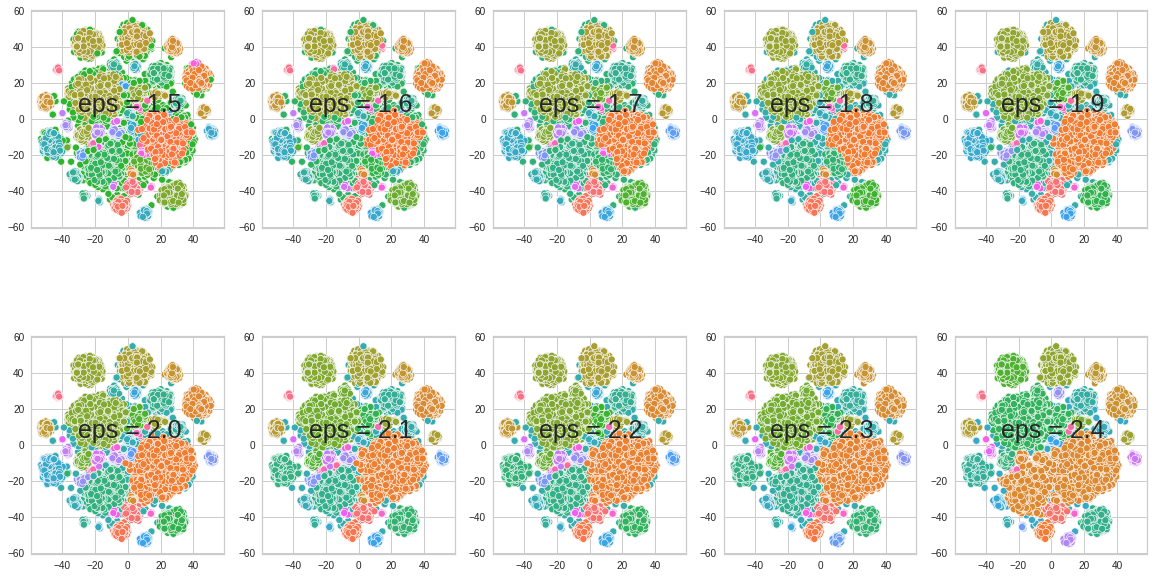

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
ran = np.arange(1.5, 2.5, 0.1)
for x in ran:
  eps = x
  db = DBSCAN(eps=eps, min_samples=20).fit(transformed)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  print("eps:" + str(eps) + ", num_clusters:" + str(len(np.unique(labels))))
  ax = fig.add_subplot(2, 5, i)
  ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
  sns.scatterplot(x = transformed[:,0], y = transformed[:,1], hue=["cluster-{}".format(x) for x in labels], legend = False)
  i += 1

min_samples:5, num_clusters:46, percent_outliers: 0.6500893872907525
min_samples:10, num_clusters:45, percent_outliers: 1.2676743052169674
min_samples:15, num_clusters:49, percent_outliers: 2.0911208624519206
min_samples:20, num_clusters:44, percent_outliers: 3.575491630099139
min_samples:25, num_clusters:40, percent_outliers: 5.049027574624844
min_samples:30, num_clusters:45, percent_outliers: 6.376293407010131
min_samples:35, num_clusters:41, percent_outliers: 9.35586976542608
min_samples:40, num_clusters:40, percent_outliers: 12.44921176661791
min_samples:45, num_clusters:42, percent_outliers: 16.42559185221301
min_samples:50, num_clusters:54, percent_outliers: 21.57213283493147


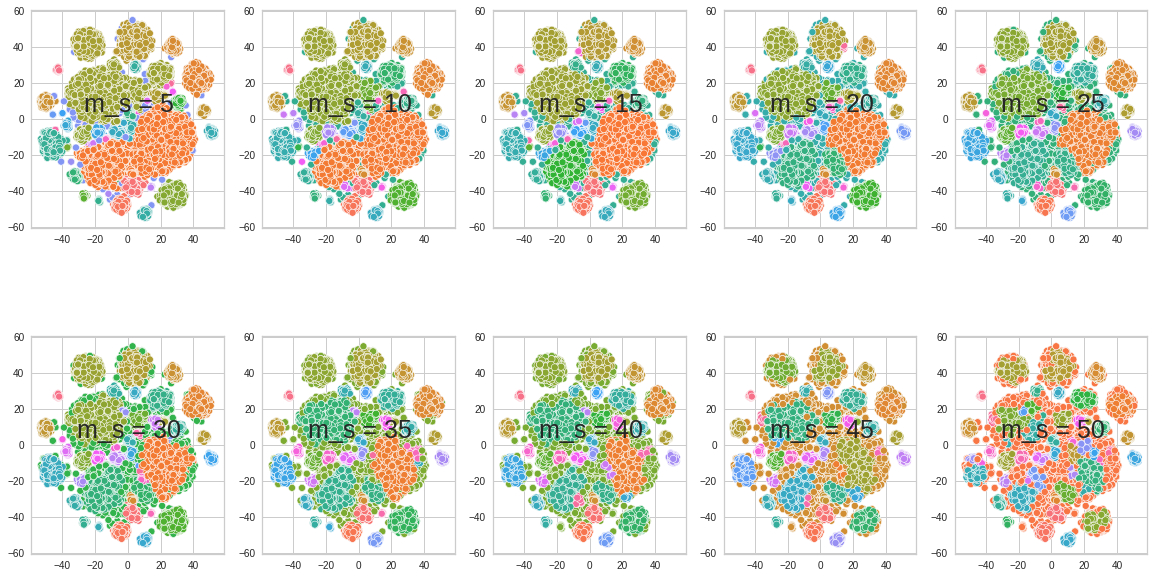

In [ ]:
#finding the optimal min_samples using visualization
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
eps = 1.8
ran = np.arange(5,55,5)
for x in ran:
  min_s = x
  db = DBSCAN(eps=eps, min_samples=min_s).fit(transformed)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  print("min_samples:" + str(min_s) + ", num_clusters:" + str(len(np.unique(labels))) + ", percent_outliers: " + str((np.sum(labels == -1))/len(DBSCAN_cluster.labels_) * 100))
  ax = fig.add_subplot(2, 5, i)
  ax.text(1, 4, "m_s = {}".format(round(min_s, 1)), fontsize=25, ha="center")
  sns.scatterplot(x = transformed[:,0], y = transformed[:,1], hue=["cluster-{}".format(x) for x in labels], legend = False)
  i += 1

### run model using the parameters found

In [ ]:
from sklearn.cluster import DBSCAN
eps = knee.knee_y
DBSCAN_cluster = DBSCAN(eps=1.82, min_samples=20).fit(transformed)
#print(DBSCAN_cluster.labels_)

In [ ]:
num_outliers = np.sum(DBSCAN_cluster.labels_ == -1)
num_clusters = len(np.unique(DBSCAN_cluster.labels_)) - 1
percentage_outliers = num_outliers/len(DBSCAN_cluster.labels_) * 100
print("Num_outliers: " + str(num_outliers))
print("num clusters: " + str(num_clusters))
print("percentage of points that are outliers: " + str(percentage_outliers))

Num_outliers: 632
num clusters: 43
percentage of points that are outliers: 3.423804106397963


In [ ]:
DBSCAN_labels = DBSCAN_cluster.labels_
if (num_outliers > 0):
  #if there are outliers in the data, shift the data up to print the unlustered data, otherwise leave as is
  DBSCAN_labels = DBSCAN_labels + 1
df, labels_DBSCAN,connective_to_label_DBSCAN,_,_,_,_ = view_labels(X, X_sentences, DBSCAN_labels, len(set(DBSCAN_labels)))

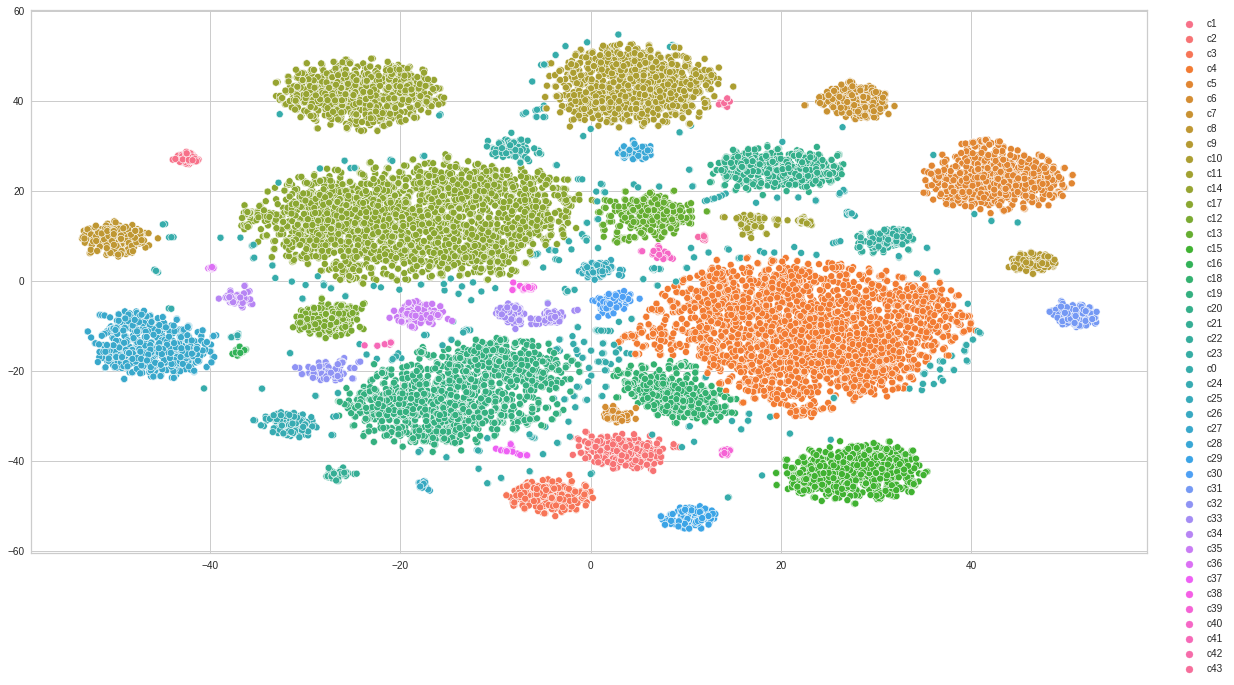

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
sns.scatterplot(x = transformed[:,0], y = transformed[:,1], hue=["c{}".format(x) for x in DBSCAN_labels])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

In [ ]:
DBSCAN_cluster.labels_

df=tag_by_labels(DBSCAN_cluster.labels_,rel_tag)
df_count=df.groupby(['kmeans_label','secondary_tag']).size().reset_index(name='counts')

In [ ]:
from pathlib import Path  
df_count
filepath = Path('similarityconcate_DBSCAN_QAEmbeddings_count.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
df_count.to_csv(filepath) 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


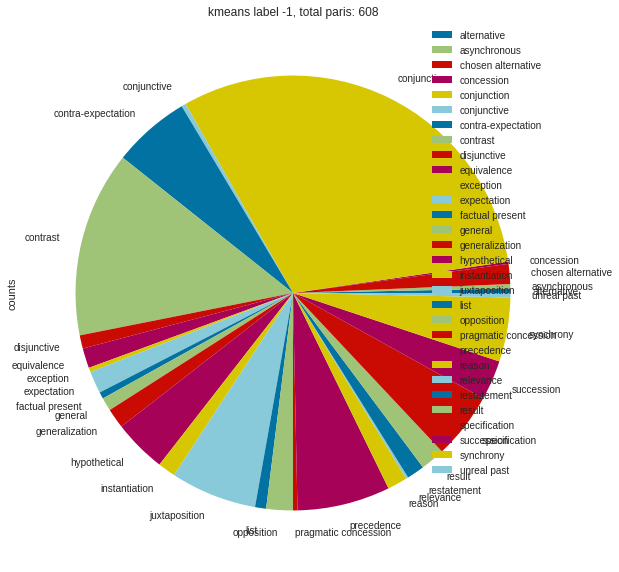

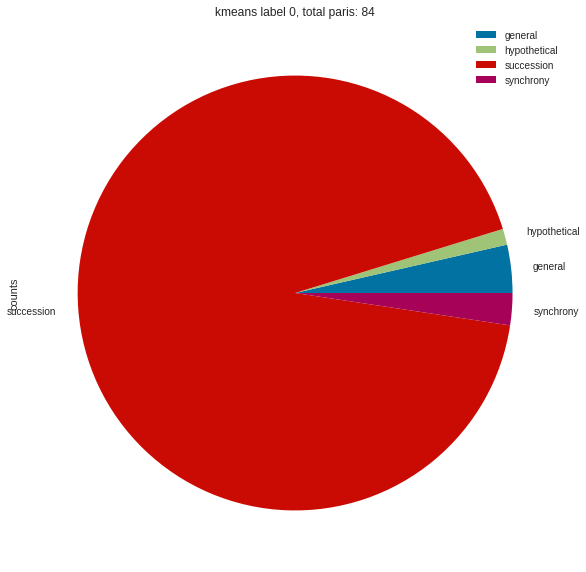

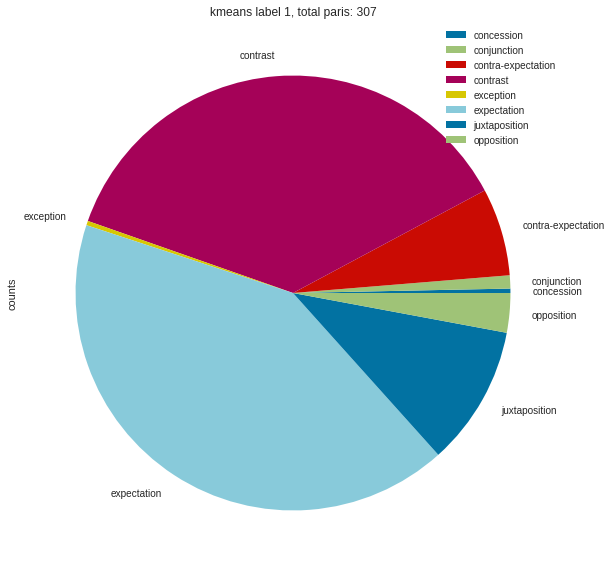

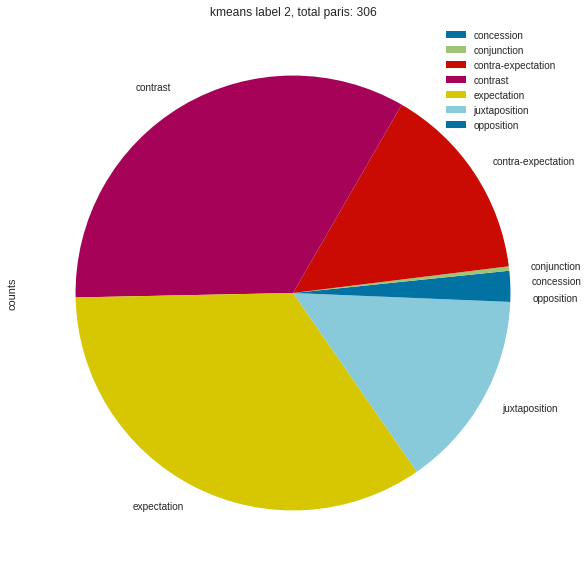

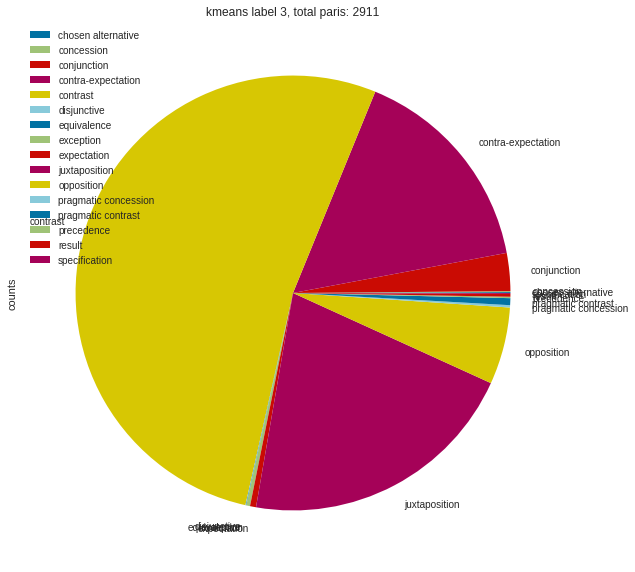

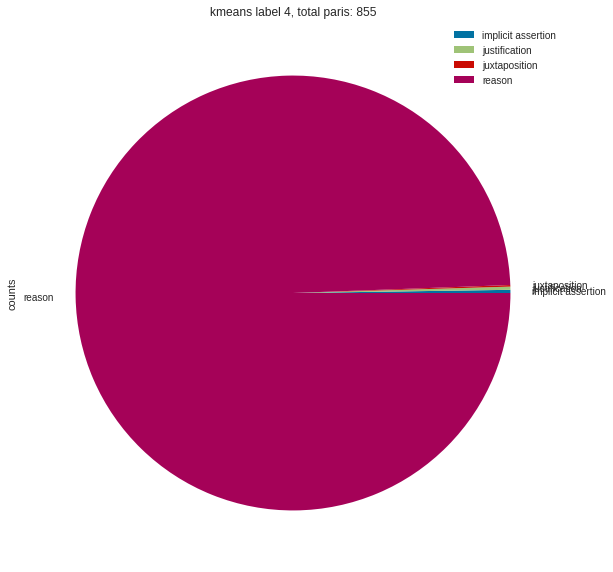

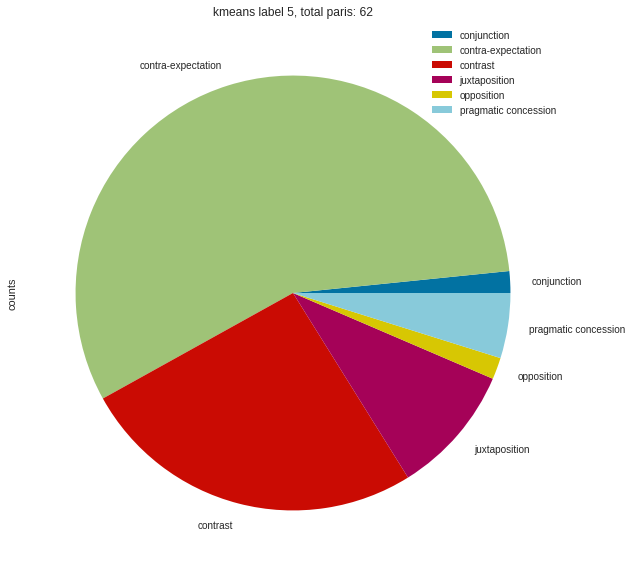

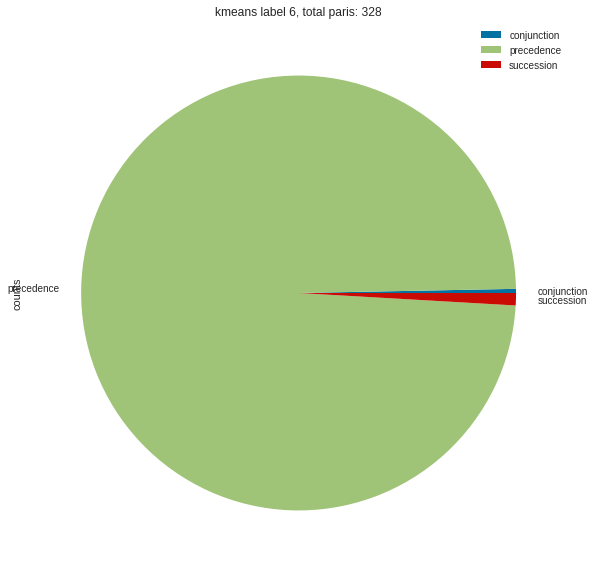

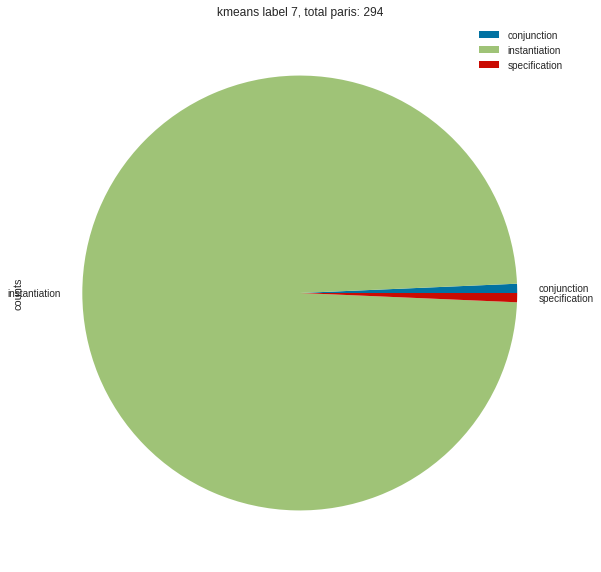

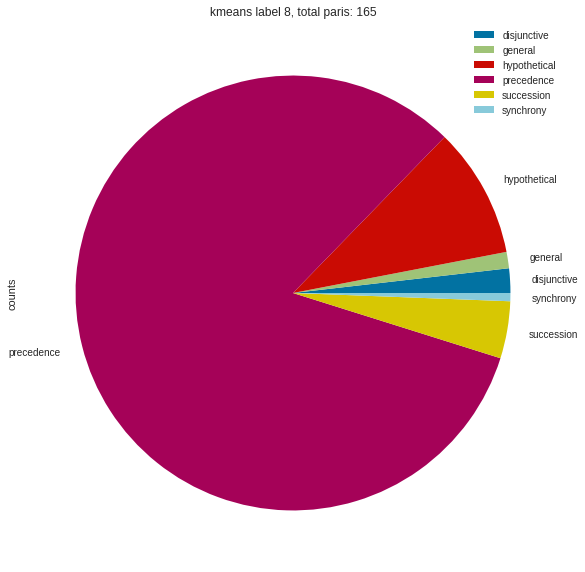

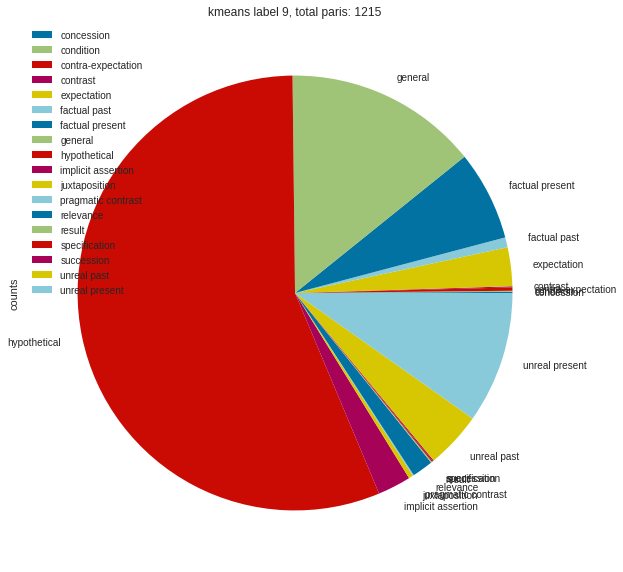

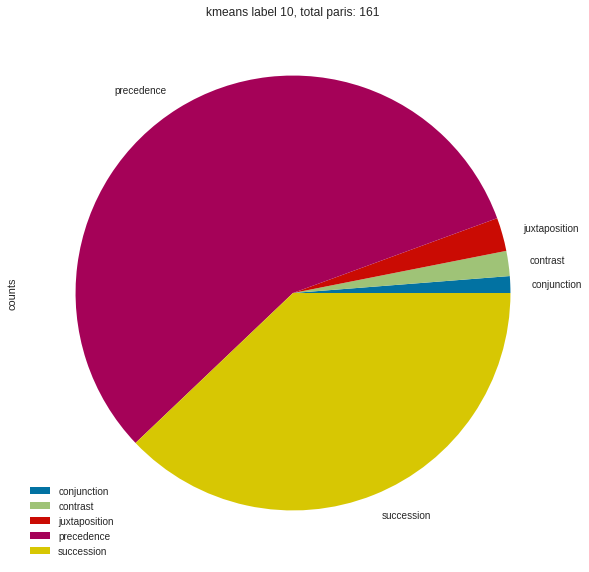

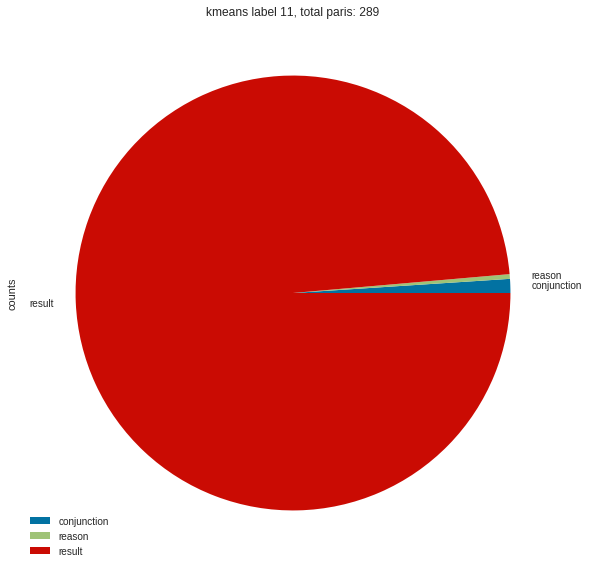

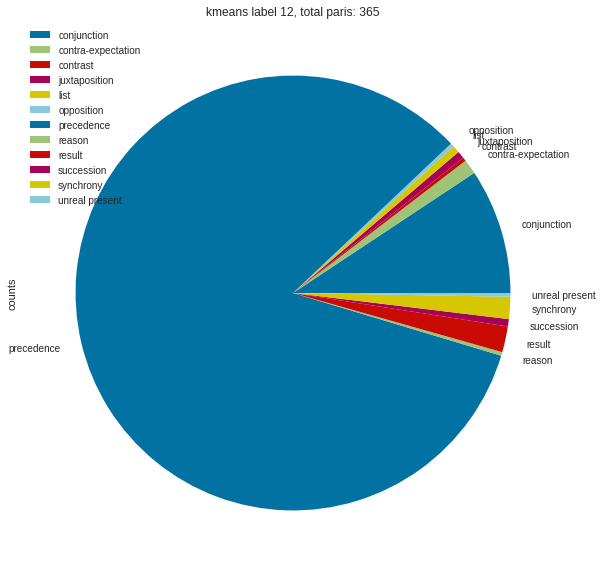

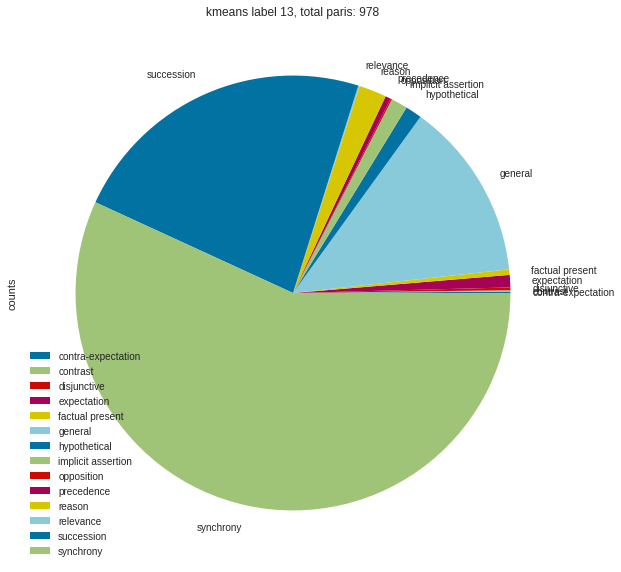

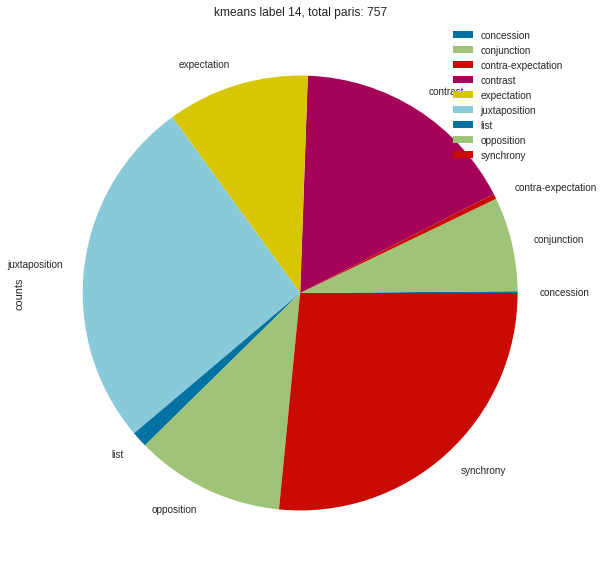

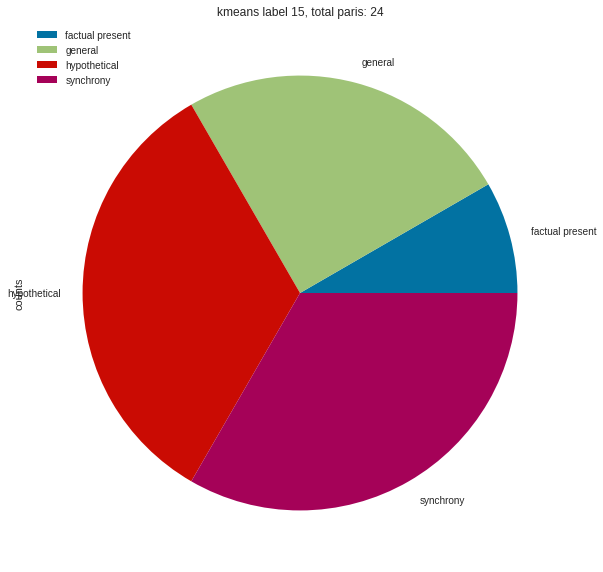

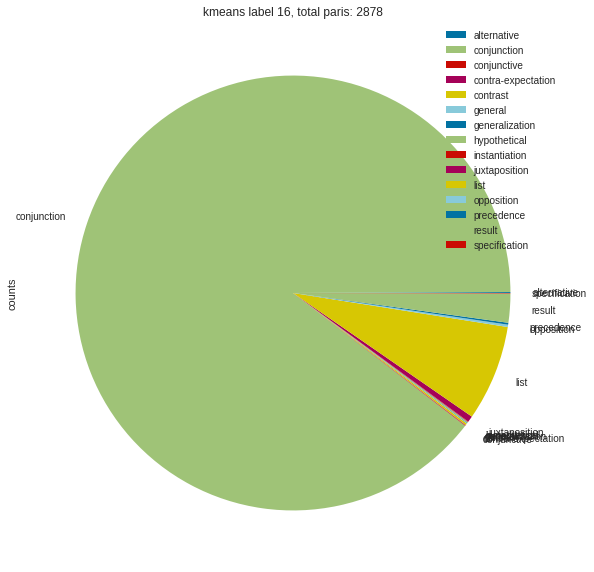

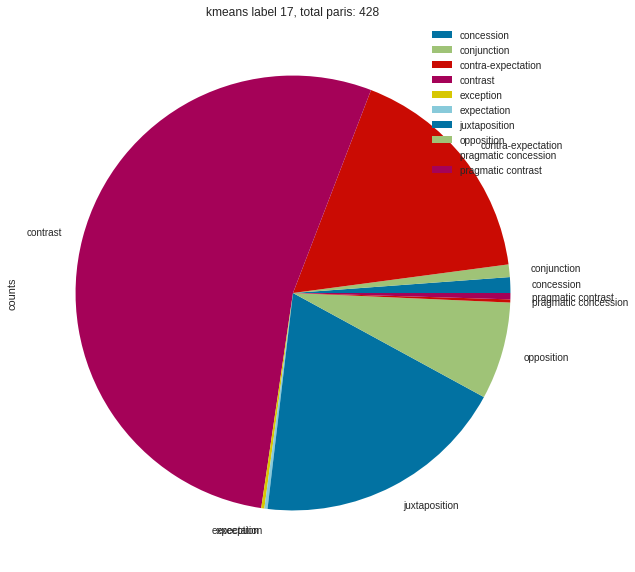

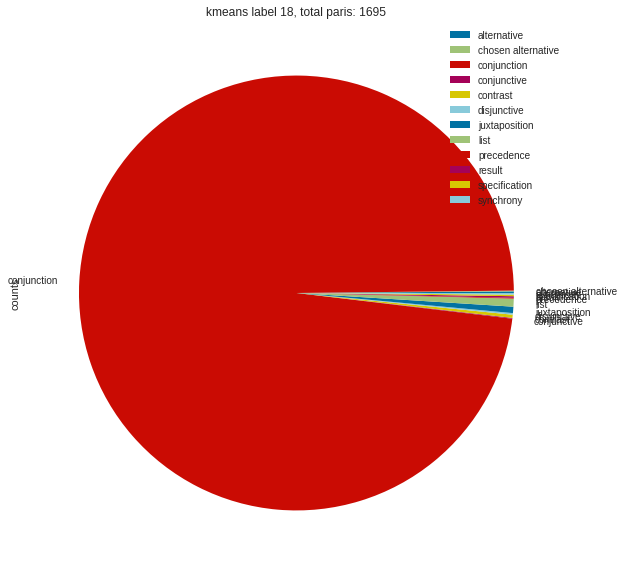

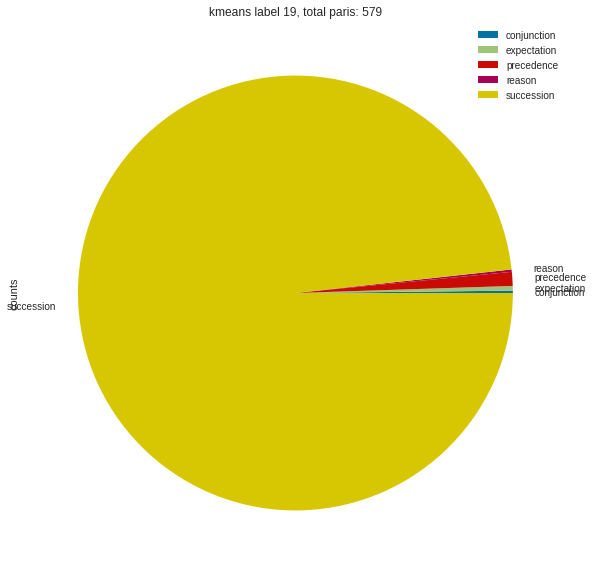

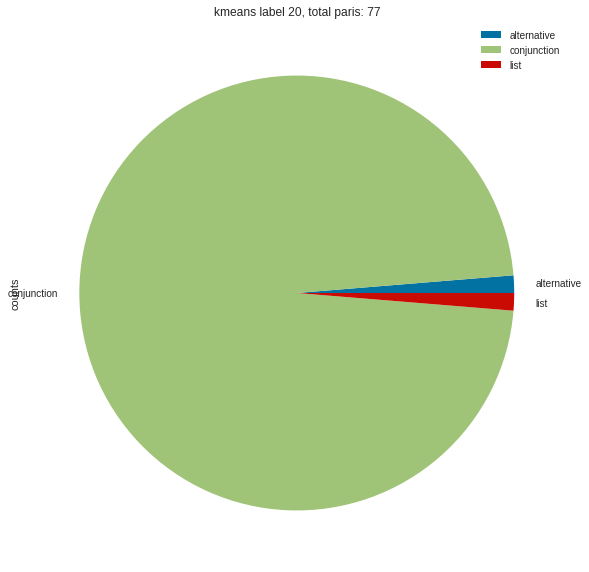

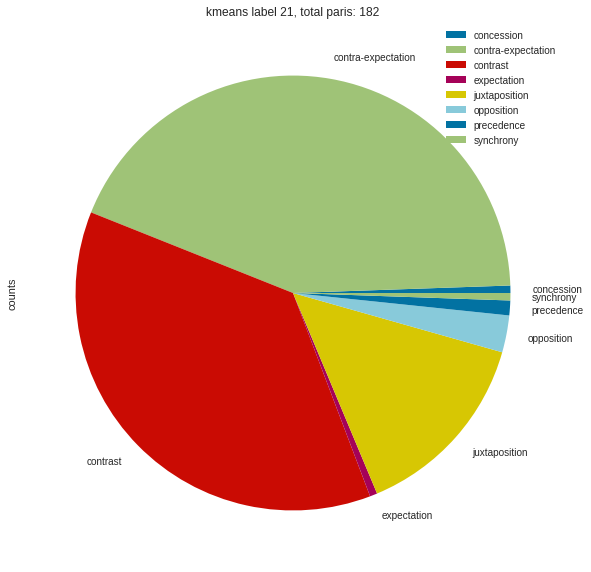

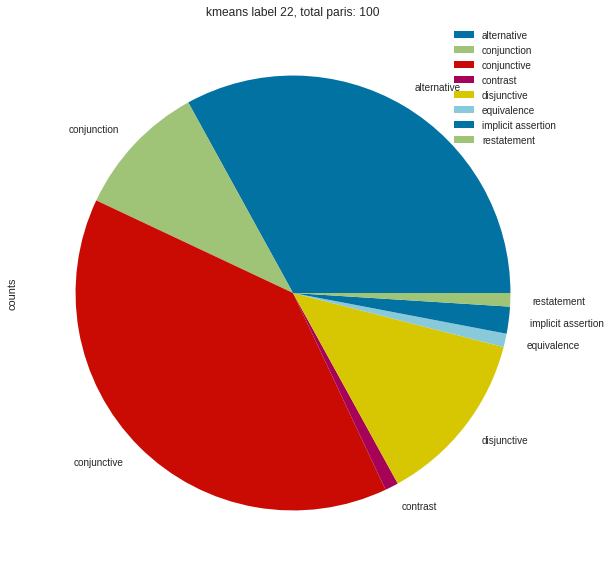

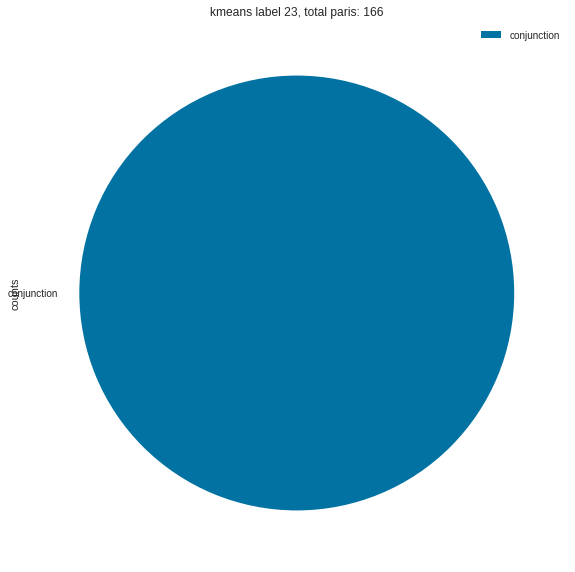

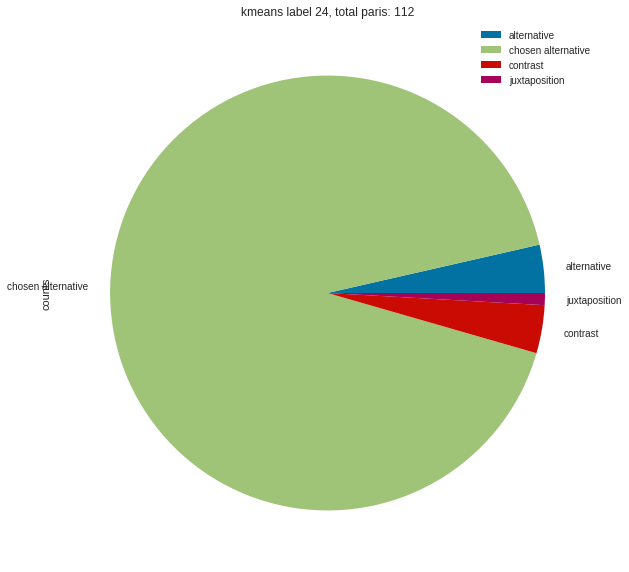

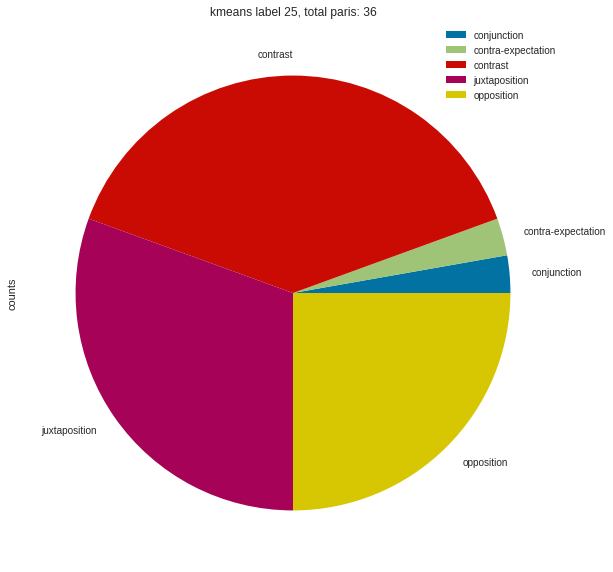

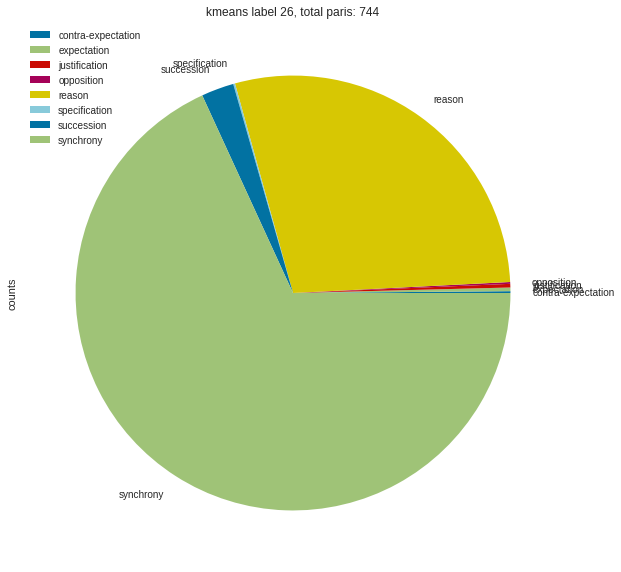

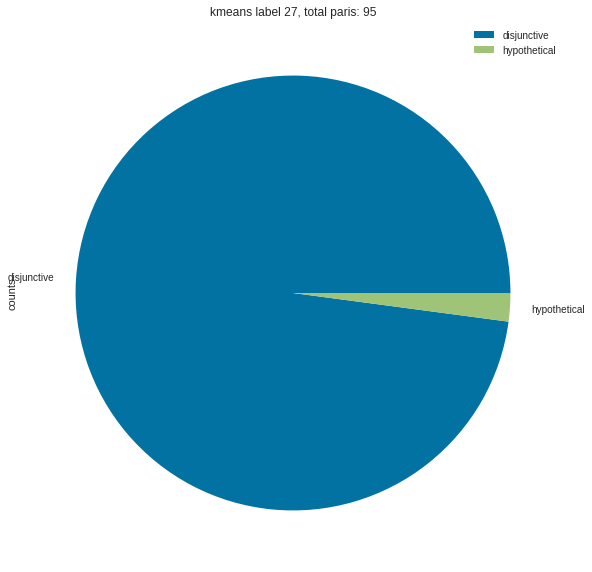

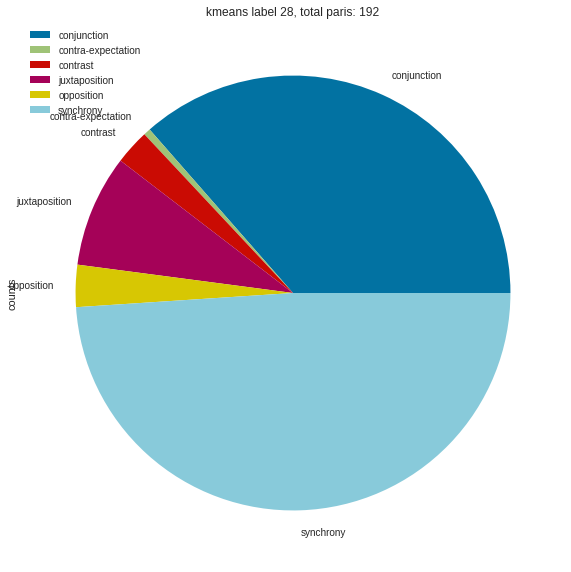

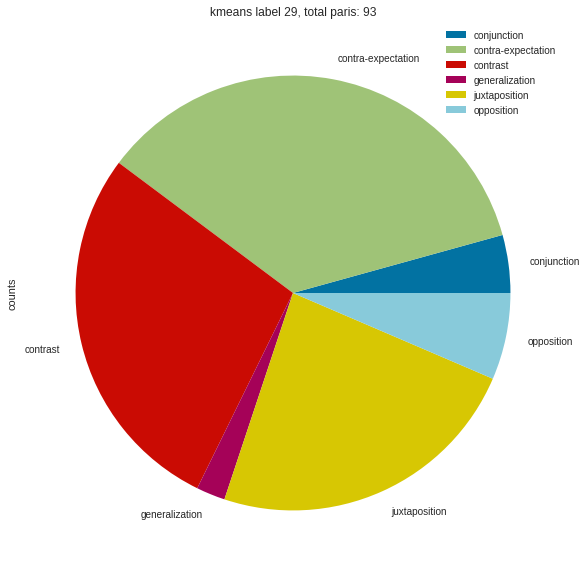

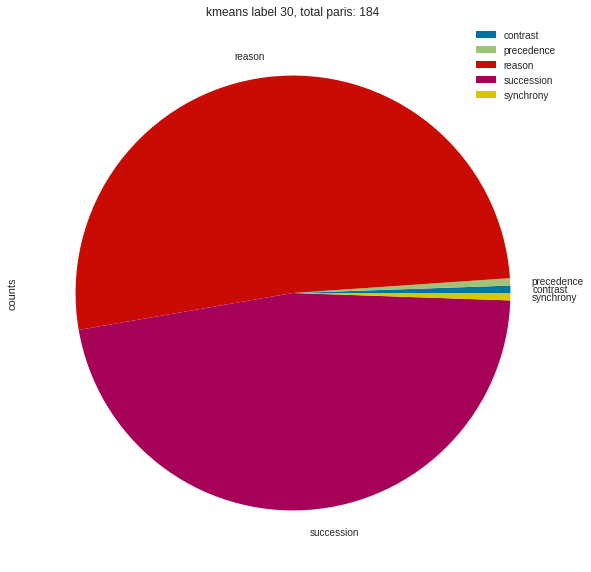

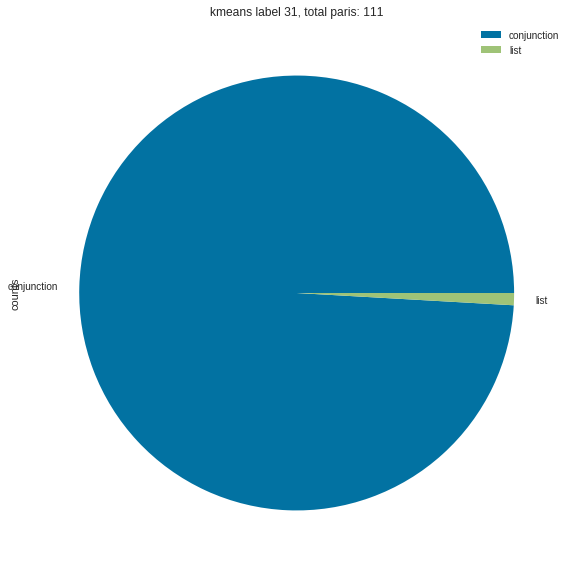

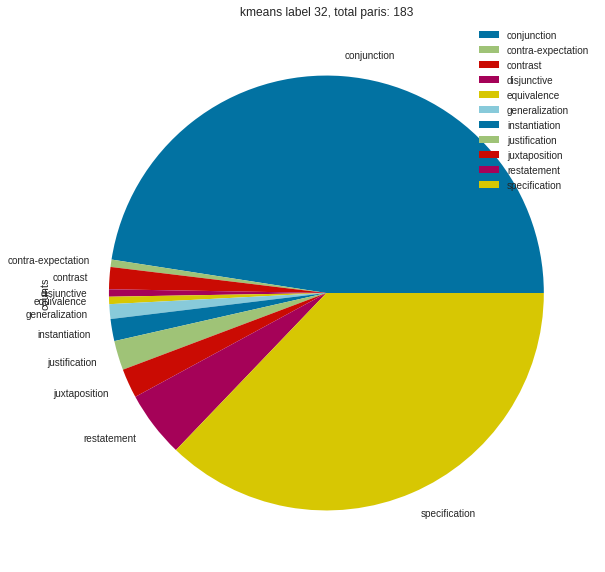

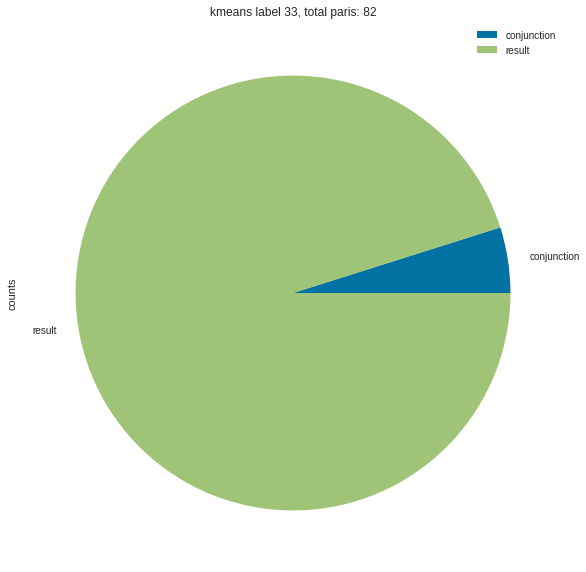

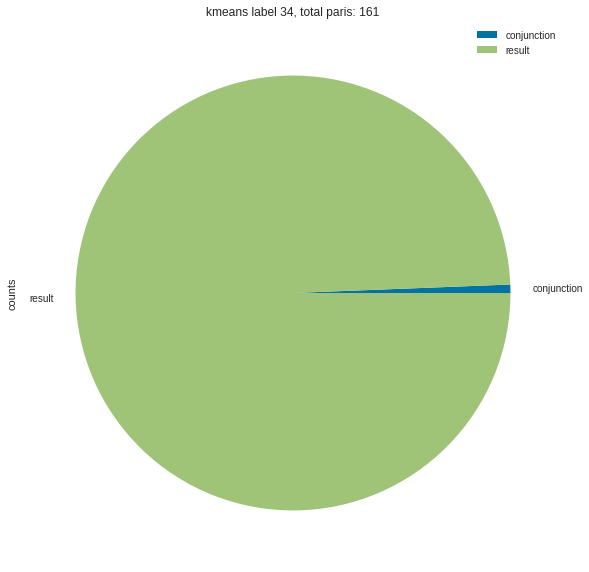

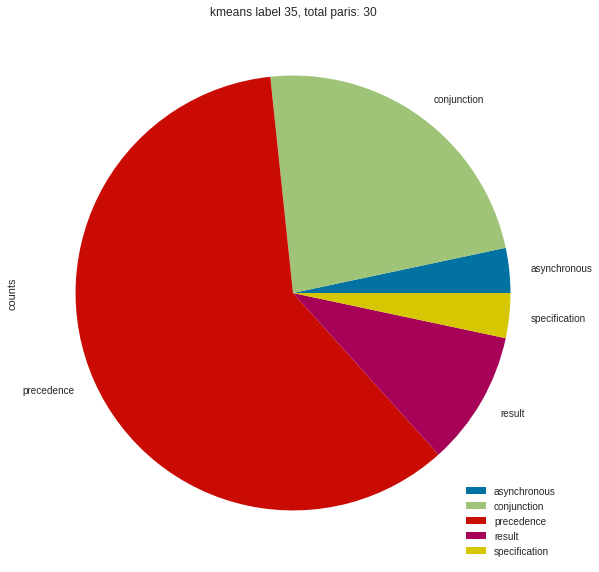

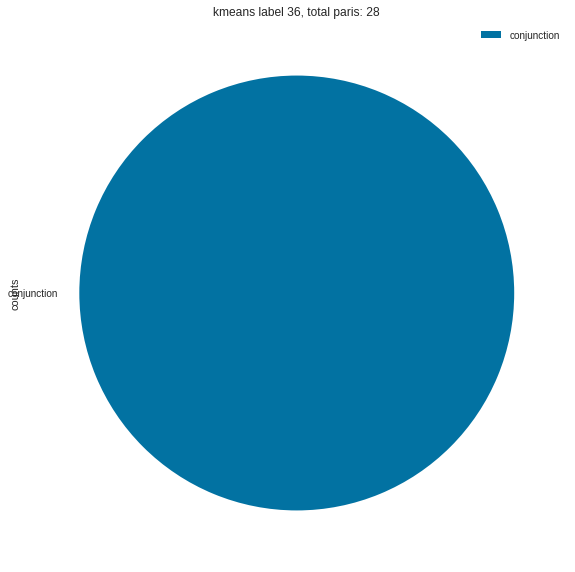

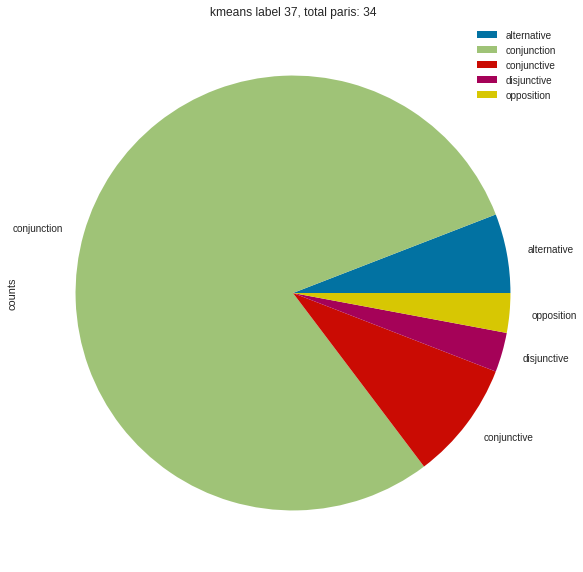

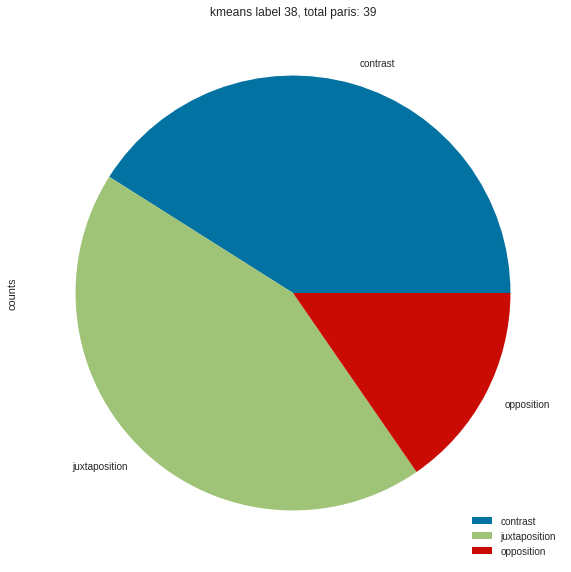

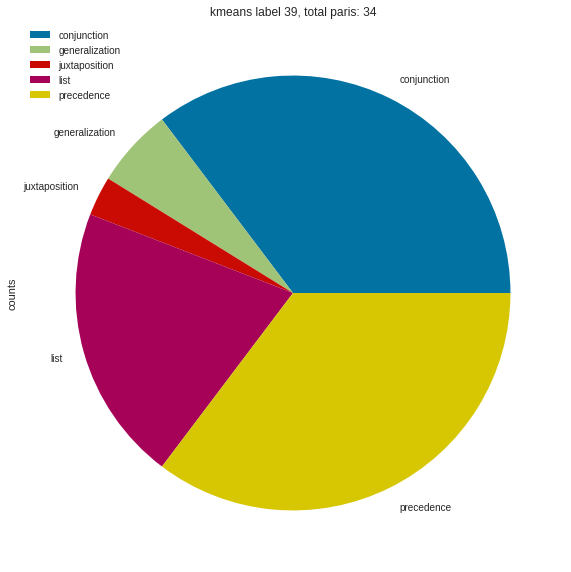

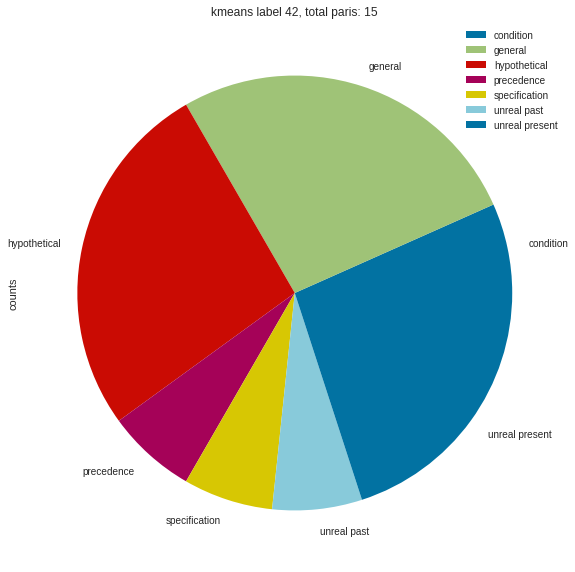

In [ ]:
for i in range(-1,43):
  df_by_klabel=df_count.loc[df_count['kmeans_label'] == i]
  total_number = df_by_klabel["counts"].sum()
  plt=df_by_klabel.set_index("secondary_tag").plot.pie(y='counts', figsize=(10, 10),fontsize=10)
  plt.set_title("kmeans label "+str(i)+", total paris: "+str(total_number))
  fig = plt.get_figure()
  fig.savefig("output"+str(i)+".png")

In [ ]:
plt.show()

AttributeError: ignored

# Extra Models

## Affinity Propogation

https://scikit-learn.org/stable/modules/clustering.html
"AffinityPropagation creates clusters by sending messages between pairs of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. The messages sent between pairs represent the suitability for one sample to be the exemplar of the other, which is updated in response to the values from other pairs. This updating happens iteratively until convergence, at which point the final exemplars are chosen, and hence the final clustering is given."

Not enough RAM to do this

In [ ]:
from sklearn.cluster import AffinityPropagation
# Fit Affinity Propagation with Scikit
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
# Predict the cluster for all the samples
P = afprop.predict(X)


## Mean-Shift

https://scikit-learn.org/stable/modules/clustering.html

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

In [ ]:
from sklearn.cluster import MeanShift
ms = MeanShift(max_iter = 10)
ms.fit(X)


KeyboardInterrupt: ignored

In [ ]:
num_clusters = len(set(ms.labels))
labels_MS,connective_to_label_MS = view_labels(X, X_sentences, ms.labels, num_clusters)



## Hierarchal Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 4).fit(X)
clustering.labels_